# TEST

[ 4.54164493  4.56434291  0.4078187   4.23910192  2.48194748  2.15837888
  1.02556161 -4.14099464]


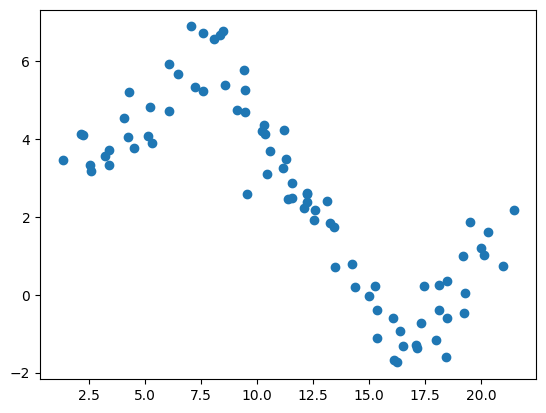

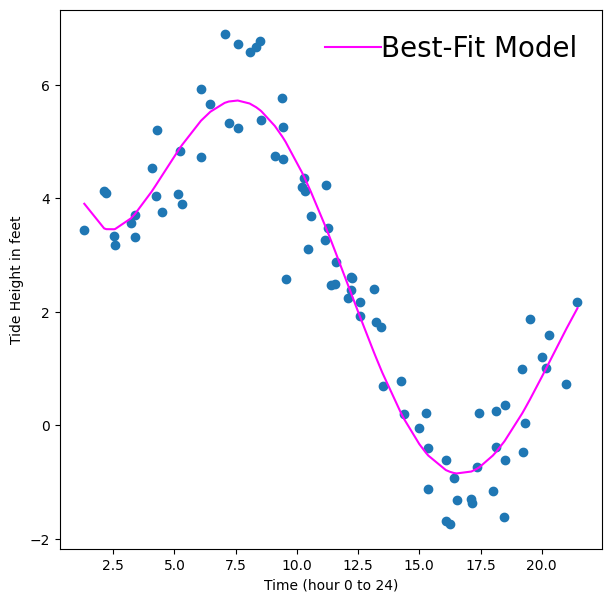

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

data = np.loadtxt("ASTR19_F23_group_project_data.txt", dtype=float,usecols=(0,2))

time_offsets = np.loadtxt("ASTR19_F23_group_project_data.txt", dtype=str,usecols=(1))

temp = []
for t in time_offsets:
    temp.append(float(t.split(':')[0] + "." +  t.split(':')[1]))
    
x = np.array(temp)
y = data[:, 1]

sorted_xy = sorted(zip(x, y))
x, y = zip(*sorted_xy)

x = np.array(x)
y = np.array(y)

plt.scatter(x,y)


# Find Best fit model
def func(x, a, b, c, d, e, f,q,w):
     return ((a * np.exp(-x / b) + f) * (np.sin(c * x + d) + e) / q) + w

params, params_cov = optimize.curve_fit(func,x,y, maxfev=10000)

print(params)


# Plot data and best fit model together

plt.figure(figsize=(7, 7))
plt.xlabel('Time (hour 0 to 24)')
plt.ylabel('Tide Height in feet')
plt.plot(x,func(x, *params),color='magenta',label='Best-Fit Model')
plt.scatter(x,y)

plt.legend(frameon=False,fontsize=20,handletextpad=0)
plt.show()

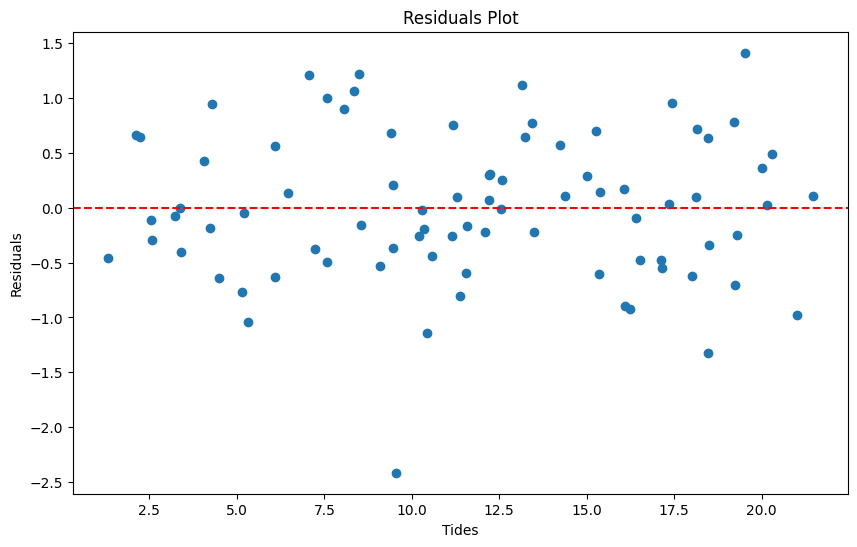

Standard Deviation of Residuals: 0.6669496076210547


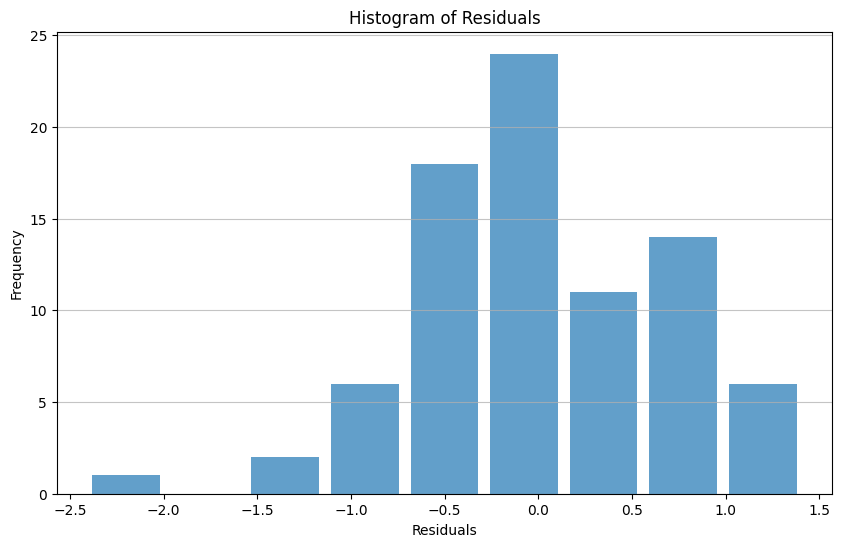

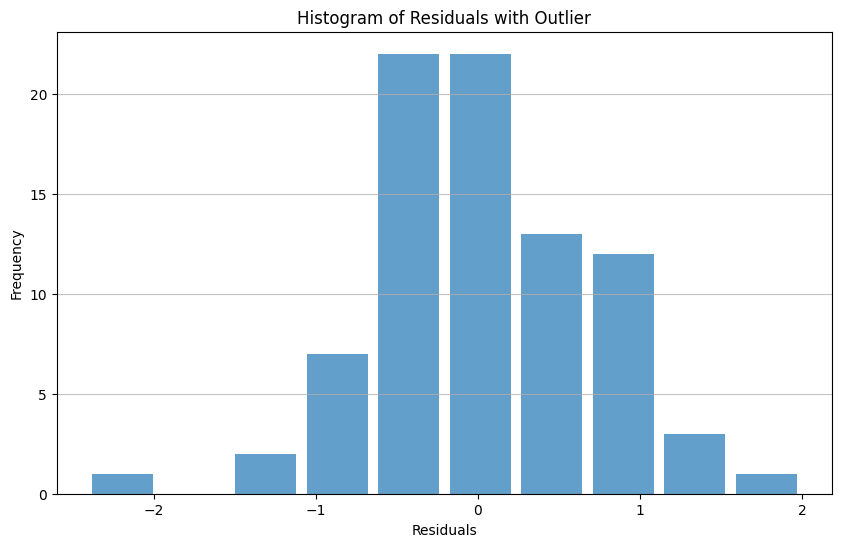

In [18]:
# Subtract the best-fit model from the data to get residuals
residuals = y - func(x, *params)

# Add a single 2ft outlier to the residuals
outlier = 2.0
residuals_with_outlier = np.append(residuals, outlier)

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tides')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Calculate the standard deviation of the residuals
std_deviation = np.std(residuals)
print(f'Standard Deviation of Residuals: {std_deviation}')

# Plot a histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(axis='y', alpha=0.75)
plt.savefig('residuals_histogram.pdf')
plt.show()

# Plot a histogram of the residuals with outlier
plt.figure(figsize=(10, 6))
plt.hist(residuals_with_outlier, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Outlier')
plt.grid(axis='y', alpha=0.75)
plt.savefig('residuals_histogram_with_outlier.pdf')
plt.show()